<h1>Subhranil Sarkar</h1>
<a href="mailto:subhranil.sarkar2605@gmail.com">subhranil.sarkar2605@gmail.com</a><br>
<a href="tel:+91-6294769160">+91-6294769160</a><br>
<a href="https://www.github.com/subhranil2605">Github: subhranil2605</a>

<h2>Deep neural network (CNN) classifier in Python to distinguish "rectangles" from "circles"</h2>

In [ ]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# image dimension
IMAGE_SIZE = 64
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
# uploading the images into the tensorflow and using batchsize
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ToyDataset/toy_train',          # directory
    shuffle=True,                                   # shuffled the data
    image_size=(IMAGE_SIZE, IMAGE_SIZE),            # image width, height, RGB
    batch_size=BATCH_SIZE                           # batch size 
)

Found 1000 files belonging to 2 classes.


In [ ]:
# validation dataset 
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ToyDataset/toy_val',          # directory
    shuffle=True,                                   # shuffled the data
    image_size=(IMAGE_SIZE, IMAGE_SIZE),            # image width, height, RGB
    batch_size=BATCH_SIZE                           # batch size 
)

Found 200 files belonging to 2 classes.


In [ ]:
# class names
class_names = dataset.class_names
class_names 

['circle', 'rectangle']

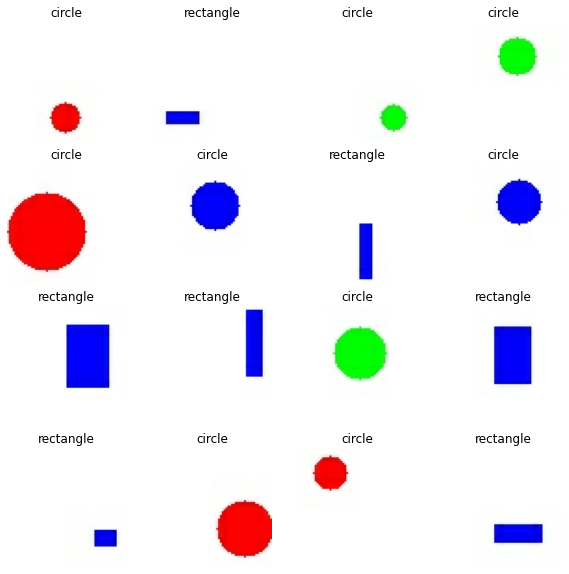

In [ ]:
# To see our data
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1): 
  for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
# creating test dataset from the train data set
def get_dataset_partition_tf(ds, train_split=0.8, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle)
    
  train_size = int(train_split * ds_size)

  train_ds = ds.take(train_size)
  test_ds = ds.skip(train_size)

  return train_ds, test_ds

In [ ]:
train_ds, test_ds = get_dataset_partition_tf(dataset)   # train and test dataset
val_ds = val_dataset                                    # validation dataset

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

25
7
7


In [ ]:
# keep the item in the memory
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# resize and rescale images
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# augmentation
data_augmentation = resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# model 
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), 
    layers.Dense(2, activation='softmax')
]) 

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 64, 64, 3)           0         
                                                                 
 conv2d (Conv2D)             (32, 62, 62, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 31, 31, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 29, 29, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 14, 14, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 12, 12, 64)         

In [ ]:
# compile our model
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# number of iteration
EPOCHS = 50

# stroing the history for future uses
history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
25/25 [==============================] - 101s 1s/step - loss: 3.4000 - accuracy: 0.6438 - val_loss: 0.5478 - val_accuracy: 0.7050
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.4363 - accuracy: 0.7937 - val_loss: 0.4482 - val_accuracy: 0.7800
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3834 - accuracy: 0.8238 - val_loss: 0.4271 - val_accuracy: 0.8350
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3980 - accuracy: 0.8125 - val_loss: 0.4047 - val_accuracy: 0.8000
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3937 - accuracy: 0.8338 - val_loss: 0.4228 - val_accuracy: 0.7900
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3857 - accuracy: 0.8125 - val_loss: 0.3793 - val_accuracy: 0.8100
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3697 - accuracy: 0.8213 - val_loss: 0.4114 - val_accuracy: 0.7900
Epoch 8/50
25/25 [

In [ ]:
# evaluating the test dataset 
scores = model.evaluate(test_ds)

7/7 [==============================] - 1s 5ms/step - loss: 0.0180 - accuracy: 0.9900


In [ ]:
# loss and accuracy
scores

[0.018027231097221375, 0.9900000095367432]

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

Text(0.5, 1.0, 'Training and Validation loss')

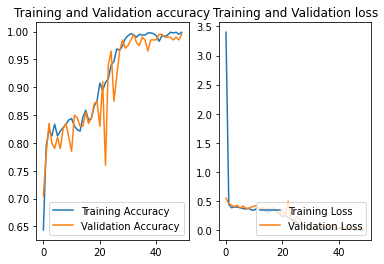

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy") 
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation accuracy")
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss") 
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc='lower right')
plt.title("Training and Validation loss")

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0) 
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

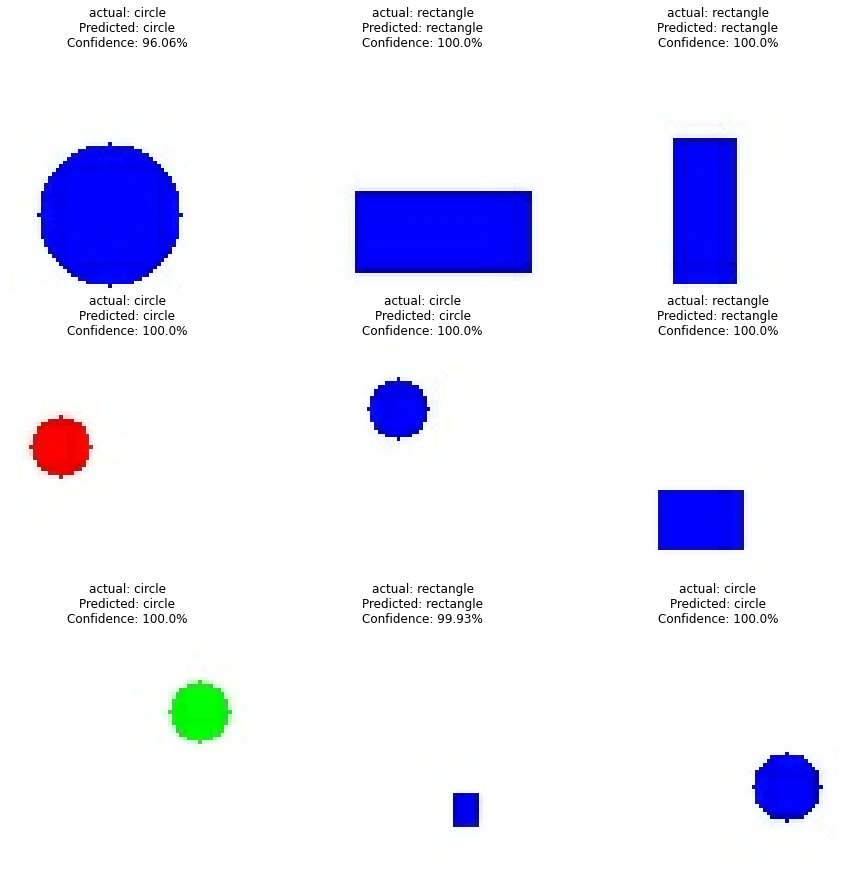

In [ ]:
plt.figure(figsize=(15, 15))

for image_batch, label_batch in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, image_batch[i])
        actual_class = class_names[label_batch[i]]
        plt.title(f"actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

<h1>Take cv2 image as input and return prediction string</h1>

In [ ]:
import cv2

class ShapeClassifier:
    """
    Class for shape classifier which has the method that takes cv2 image 
    and returns the predicted value with confidence level.
    """
    def __init__(self, path, model):
        self.path = path
        self.model = model

    def predict_from_cv(self):
        img = cv2.imread(self.path)
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_NEAREST)
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(RGB_img)
        plt.axis("off")

        img_array = tf.expand_dims(RGB_img, 0) 

        predictions = self.model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        
        return f"The shape is: '{predicted_class}' with confidence level: {confidence} %" 

"The shape is: 'circle' with confidence level: 100.0 %"

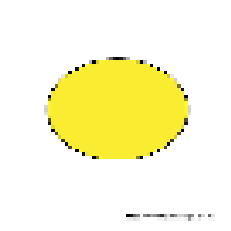

In [ ]:
# downloaded image for checking the model
path1 = '/content/1.png'

s = ShapeClassifier(path1, model)
s.predict_from_cv()

"The shape is: 'rectangle' with confidence level: 100.0 %"

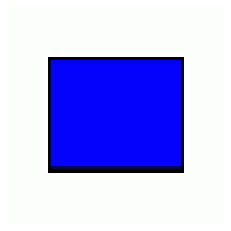

In [ ]:
path2 = '/content/2.png'

s = ShapeClassifier(path2, model)
s.predict_from_cv()